In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
baseline = 5.4578 # From traditional rMTA best single-gene result

In [4]:
simplified_solution = pd.read_csv('simplification_trace_all.csv')
simplified_solution

,Step,Remaining Genes,Genes Count,Removed Gene,Fitness,Delta,Individual
0,0,189_AT1;1638_AT1;3283_AT1;55217_AT1;21_AT1;132...,10,NaN,6.479791,0.000000,0
1,1,189_AT1;1638_AT1;3283_AT1;21_AT1;132158_AT1;52...,9,55217_AT1,6.479193,0.000599,0
2,2,189_AT1;1638_AT1;3283_AT1;21_AT1;132158_AT1;52...,8,113612_AT1,6.477763,0.001430,0
3,3,189_AT1;3283_AT1;21_AT1;132158_AT1;5230_AT1;87...,7,1638_AT1,6.476067,0.001696,0
4,4,3283_AT1;21_AT1;132158_AT1;5230_AT1;8781_AT1;2...,6,189_AT1,6.470099,0.005968,0
...,...,...,...,...,...,...,...
88,5,21_AT1;132158_AT1;5230_AT1;8781_AT1;283209_AT1,5,189_AT1,6.454117,0.006057,9
89,6,132158_AT1;5230_AT1;8781_AT1;283209_AT1,4,21_AT1,6.367559,0.086559,9
90,7,132158_AT1;5230_AT1;283209_AT1,3,8781_AT1,6.206517,0.161041,9
91,8,5230_AT1;283209_AT1,2,132158_AT1,5.673439,0.533078,9


In [5]:
def convert_step_to_numeric(step):
    """Convert step to an integer, mapping 'Final' to a numeric value (e.g., 19)."""
    if step == 'Final':
        return 19
    else:
        return int(step)

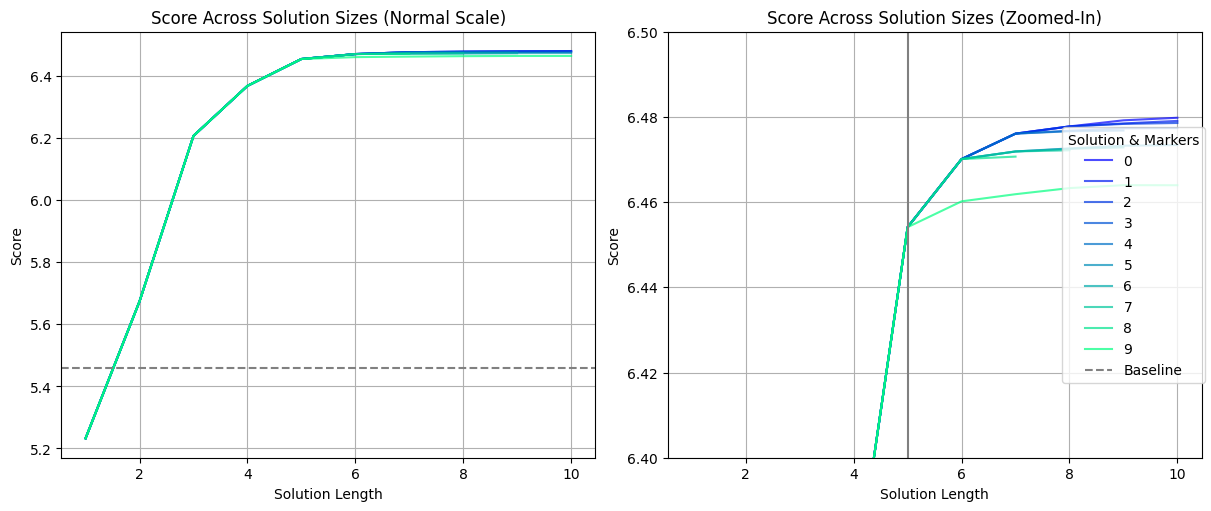

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- assume `simplified_solution` and `baseline` are already defined ---

fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# (A) Normal scale plot, with full legend
sns.lineplot(
    data=simplified_solution,
    x='Genes Count',
    y='Fitness',
    hue='Individual',
    legend='full',    # force all Individuals into the legend
    ax=axes[0],
    alpha=0.7,
    palette="winter"
)
axes[0].set_title('Score Across Solution Sizes (Normal Scale)')
axes[0].set_xlabel('Solution Length')
axes[0].set_ylabel('Score')
axes[0].grid(True)

# add baseline
axes[0].axhline(y=baseline, color='gray', linestyle='--', label='Baseline')

# (B) Zoomed-in plot, no per-axes legend
sns.lineplot(
    data=simplified_solution,
    x='Genes Count',
    y='Fitness',
    hue='Individual',
    legend=False,
    ax=axes[1],
    alpha=0.7,
    palette="winter"
)
axes[1].set_title('Score Across Solution Sizes (Zoomed-In)')
axes[1].set_xlabel('Solution Length')
axes[1].set_ylabel('Score')
axes[1].set_ylim(6.4, 6.5)
axes[1].grid(True)

# add convergence point
axes[1].axvline(x=5, color='gray', linestyle='-', label='Convergence Point')

# collect all handles/labels from the first axes (which now also has Baseline)
handles, labels = axes[0].get_legend_handles_labels()

# remove the axes‐level legend so it doesn’t draw twice
axes[0].get_legend().remove()

# draw one figure‐level legend on the right
fig.legend(
    handles,
    labels,
    title='Solution & Markers',
    loc='center right'
)

plt.show()


/tmp/ipykernel_2652530/2443746979.py:11: UserWarning: 
The palette list has fewer values (9) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=simplified_solution, x='Genes Count', y='Fitness', hue='Individual', ax=ax, alpha=0.7, palette=palette)
/tmp/ipykernel_2652530/2443746979.py:35: UserWarning: 
The palette list has fewer values (9) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=simplified_solution,x='Genes Count', y='Fitness', hue='Individual', ax=axins, alpha=0.8, legend=False, palette=palette)


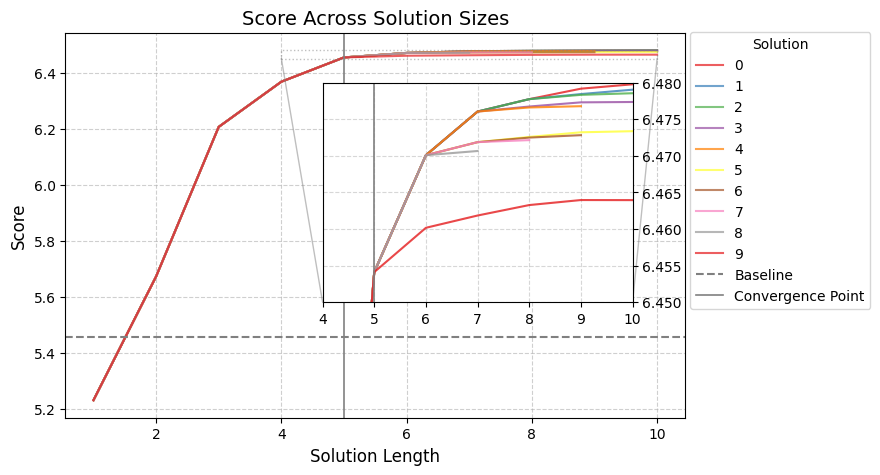

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the main figure
fig, ax = plt.subplots(figsize=(8, 5))
palette = sns.color_palette("Set1")

# Plot the main line plot
sns.lineplot(data=simplified_solution, x='Genes Count', y='Fitness', hue='Individual', ax=ax, alpha=0.7, palette=palette)

# Add baseline
ax.axhline(y=baseline, color='gray', linestyle='--', label='Baseline')

# Add a vertical line at x=5 for the convergence point
ax.axvline(x=5, color='gray', linewidth=1.2, label='Convergence Point')

# Titles and labels
ax.set_title('Score Across Solution Sizes', fontsize=14)
ax.set_xlabel('Solution Length', fontsize=12)
ax.set_ylabel('Score', fontsize=12)

# Add grid to the main plot
ax.grid(True, linestyle='--', alpha=0.6)

# Define inset zoom region
x1, x2 = 4, 10   # X-axis range for zoom-in
y1, y2 = 6.45, 6.48  # Y-axis range for zoom-in

# **New Positioning: Bottom-Right**
axins = ax.inset_axes([0.415, 0.30, 0.50, 0.57], xlim=(x1, x2), ylim=(y1, y2))  

# Plot zoomed-in section
sns.lineplot(data=simplified_solution,x='Genes Count', y='Fitness', hue='Individual', ax=axins, alpha=0.8, legend=False, palette=palette)

# Add a dashed line at x=12 inside the inset
axins.axvline(x=5, color='gray', linewidth=1.2)

# **Move Y-axis labels of the inset to the right side**
axins.yaxis.tick_right()  # Move ticks to the right
axins.yaxis.set_label_position("right")  # Move label to the right
axins.spines["right"].set_visible(True)  # Show right spine

# **Add Y-label to the zoomed-in plot**
#axins.set_ylabel("Score", fontsize=10, labelpad=12)  
# remove x label
axins.set_xlabel("")

# **Add X-label to the zoomed-in plot**
#axins.set_xlabel("Solution Size", fontsize=10, labelpad=8)

#remove y label

axins.set_ylabel("")

# Indicate zoom with **dotted** lines instead of solid
ax.indicate_inset_zoom(axins, edgecolor="gray", linestyle="dotted", alpha=0.5)

# Add grid to the inset plot
axins.grid(True, linestyle='--', alpha=0.5)

# Remove individual legends from both plots
ax.legend_.remove()

# Extract unique legend handles and labels
handles, labels = ax.get_legend_handles_labels()
unique_labels = []
unique_handles = []
for handle, label in zip(handles, labels):
    if label not in unique_labels:
        unique_labels.append(label)
        unique_handles.append(handle)

# Add SINGLE legend outside the plot, reduce font size slightly
fig.legend(unique_handles, unique_labels, loc='upper right', title="Solution", bbox_to_anchor=(1.140, 0.895), fontsize=10)

plt.savefig('score_across_solution_final_joined.pdf', bbox_inches='tight')
plt.savefig('score_across_solution_final_joined.png', bbox_inches='tight', dpi=300)

# Show the final plot
plt.show()


/tmp/ipykernel_2652530/982384794.py:12: UserWarning: 
The palette list has fewer values (9) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=simplified_solution, x='Genes Count', y='Fitness', hue='Individual',
/tmp/ipykernel_2652530/982384794.py:23: UserWarning: 
The palette list has fewer values (9) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=simplified_solution, x='Genes Count', y='Fitness', hue='Individual',


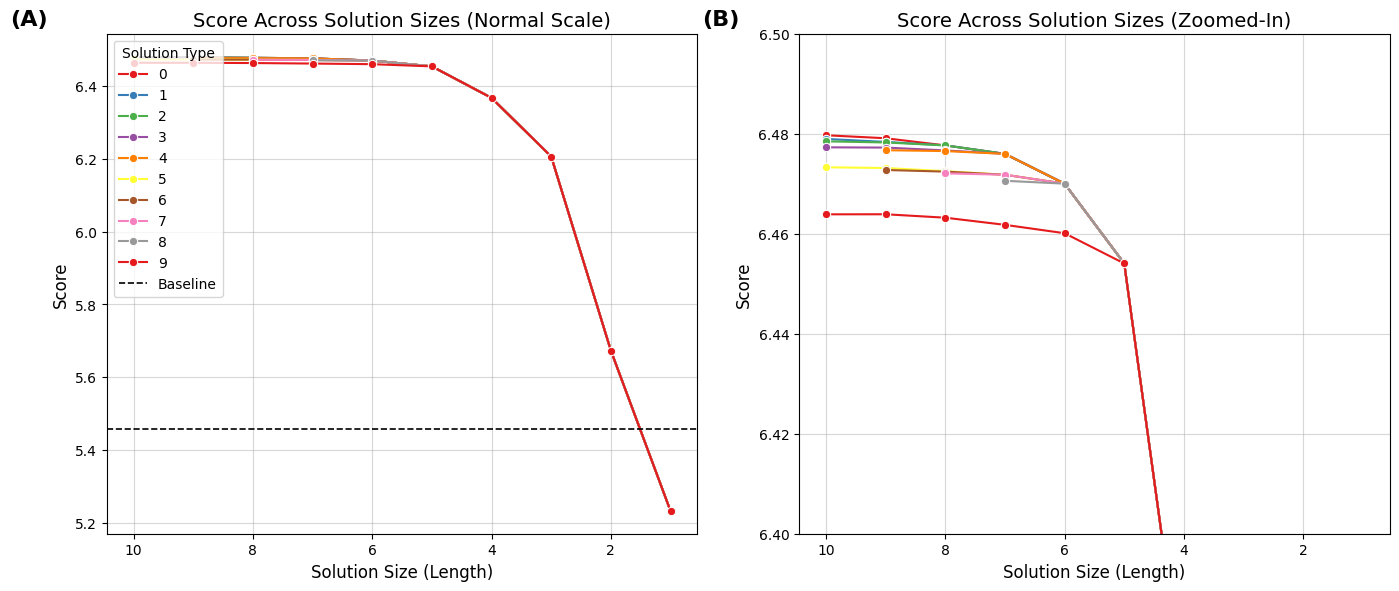

In [8]:
# Initialize a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Define a color palette
palette = sns.color_palette("Set1")

# Add grid to both subplots
for ax in axes:
    ax.grid(alpha=0.5)

# 3A. Plot "Score After Removal" over Steps (Normal Scale)
sns.lineplot(data=simplified_solution, x='Genes Count', y='Fitness', hue='Individual', 
             marker='o', ax=axes[0], palette=palette)
axes[0].axhline(y=baseline, color='black', linestyle='--', linewidth=1.2, label='Baseline')
axes[0].set_title('Score Across Solution Sizes (Normal Scale)', fontsize=14)
axes[0].set_xlabel('Solution Size (Length)', fontsize=12)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].invert_xaxis()
axes[0].legend(title='Solution Type')


# 3B. Plot the same data with a zoomed-in y-axis scale
sns.lineplot(data=simplified_solution, x='Genes Count', y='Fitness', hue='Individual', 
             marker='o', ax=axes[1], palette=palette)
axes[1].set_title('Score Across Solution Sizes (Zoomed-In)', fontsize=14)
axes[1].set_xlabel('Solution Size (Length)', fontsize=12)
axes[1].set_ylabel('Score', fontsize=12)
axes[1].set_ylim(6.4, 6.5)
axes[1].invert_xaxis()
axes[1].legend().set_visible(False)



# Add a legend to the first subplot
axes[0].legend(title='Solution Type', loc='upper left')


# Add subplot labels
axes[0].text(-0.1, 1.05, '(A)', transform=axes[0].transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
axes[1].text(-0.1, 1.05, '(B)', transform=axes[1].transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

plt.tight_layout()
plt.show()


In [9]:
print(simplified_solution.columns)


Index(['Step', 'Remaining Genes', 'Genes Count', 'Removed Gene', 'Fitness',
       'Delta', 'Individual'],
      dtype='object')


/tmp/ipykernel_2652530/1401366206.py:12: UserWarning: 
The palette list has fewer values (9) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=simplified_solution, x='Genes Count', y='Fitness', hue='Individual',
/tmp/ipykernel_2652530/1401366206.py:22: UserWarning: 
The palette list has fewer values (9) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=simplified_solution, x='Genes Count', y='Fitness', hue='Individual',


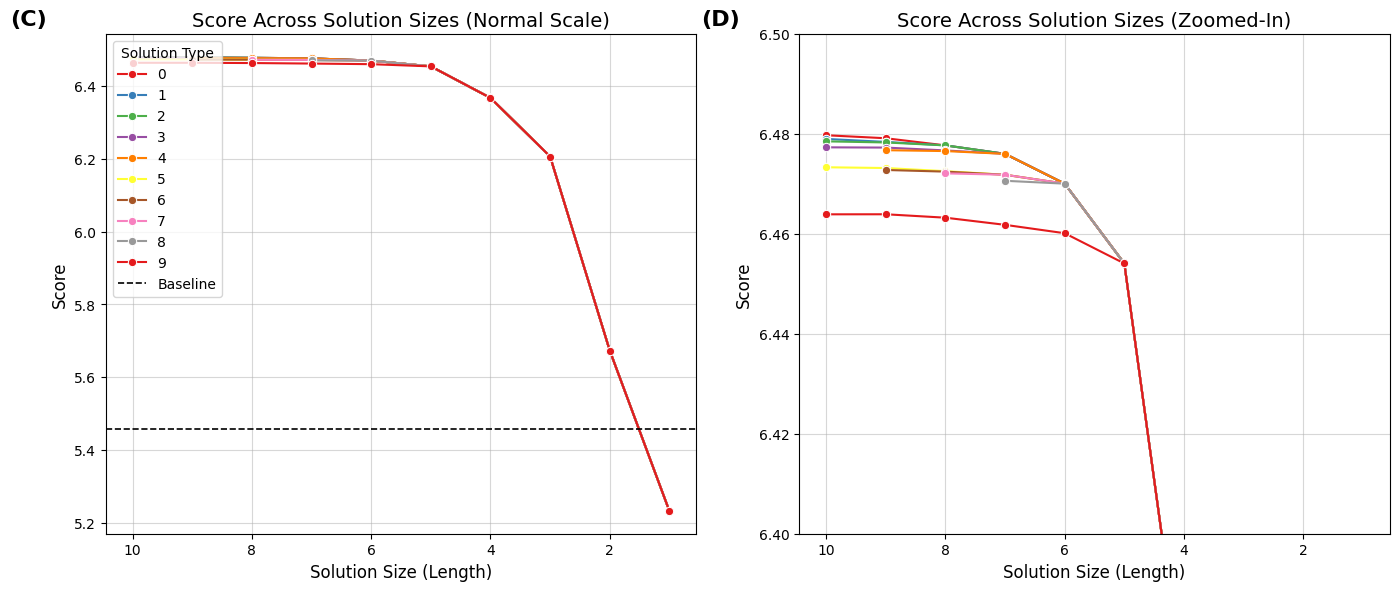

In [10]:
# Initialize a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Define a color palette
palette = sns.color_palette("Set1")

# Add grid to both subplots
for ax in axes:
    ax.grid(alpha=0.5)

# Plot A - Normal Scale
sns.lineplot(data=simplified_solution, x='Genes Count', y='Fitness', hue='Individual',
             marker='o', ax=axes[0], palette=palette)
axes[0].axhline(y=baseline, color='black', linestyle='--', linewidth=1.2, label='Baseline')
axes[0].set_title('Score Across Solution Sizes (Normal Scale)', fontsize=14)
axes[0].set_xlabel('Solution Size (Length)', fontsize=12)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].invert_xaxis()
axes[0].legend(title='Solution Type', loc='upper left')

# Plot B - Zoomed-In Y-Axis
sns.lineplot(data=simplified_solution, x='Genes Count', y='Fitness', hue='Individual',
             marker='o', ax=axes[1], palette=palette)
axes[1].set_title('Score Across Solution Sizes (Zoomed-In)', fontsize=14)
axes[1].set_xlabel('Solution Size (Length)', fontsize=12)
axes[1].set_ylabel('Score', fontsize=12)
axes[1].set_ylim(6.4, 6.5)
axes[1].invert_xaxis()
axes[1].legend().set_visible(False)

# Add subplot labels
axes[0].text(-0.1, 1.05, '(C)', transform=axes[0].transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
axes[1].text(-0.1, 1.05, '(D)', transform=axes[1].transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

plt.tight_layout()
plt.show()


In [11]:
df = simplified_solution
df

,Step,Remaining Genes,Genes Count,Removed Gene,Fitness,Delta,Individual
0,0,189_AT1;1638_AT1;3283_AT1;55217_AT1;21_AT1;132...,10,NaN,6.479791,0.000000,0
1,1,189_AT1;1638_AT1;3283_AT1;21_AT1;132158_AT1;52...,9,55217_AT1,6.479193,0.000599,0
2,2,189_AT1;1638_AT1;3283_AT1;21_AT1;132158_AT1;52...,8,113612_AT1,6.477763,0.001430,0
3,3,189_AT1;3283_AT1;21_AT1;132158_AT1;5230_AT1;87...,7,1638_AT1,6.476067,0.001696,0
4,4,3283_AT1;21_AT1;132158_AT1;5230_AT1;8781_AT1;2...,6,189_AT1,6.470099,0.005968,0
...,...,...,...,...,...,...,...
88,5,21_AT1;132158_AT1;5230_AT1;8781_AT1;283209_AT1,5,189_AT1,6.454117,0.006057,9
89,6,132158_AT1;5230_AT1;8781_AT1;283209_AT1,4,21_AT1,6.367559,0.086559,9
90,7,132158_AT1;5230_AT1;283209_AT1,3,8781_AT1,6.206517,0.161041,9
91,8,5230_AT1;283209_AT1,2,132158_AT1,5.673439,0.533078,9


In [12]:
genes_list = df['Remaining Genes'].head(10).tolist()
genes_list = [genes.split(';') if isinstance(genes, str) else [] for genes in genes_list]
genes_list

[['189_AT1',
  '1638_AT1',
  '3283_AT1',
  '55217_AT1',
  '21_AT1',
  '132158_AT1',
  '5230_AT1',
  '8781_AT1',
  '283209_AT1',
  '113612_AT1'],
 ['189_AT1',
  '1638_AT1',
  '3283_AT1',
  '21_AT1',
  '132158_AT1',
  '5230_AT1',
  '8781_AT1',
  '283209_AT1',
  '113612_AT1'],
 ['189_AT1',
  '1638_AT1',
  '3283_AT1',
  '21_AT1',
  '132158_AT1',
  '5230_AT1',
  '8781_AT1',
  '283209_AT1'],
 ['189_AT1',
  '3283_AT1',
  '21_AT1',
  '132158_AT1',
  '5230_AT1',
  '8781_AT1',
  '283209_AT1'],
 ['3283_AT1', '21_AT1', '132158_AT1', '5230_AT1', '8781_AT1', '283209_AT1'],
 ['21_AT1', '132158_AT1', '5230_AT1', '8781_AT1', '283209_AT1'],
 ['132158_AT1', '5230_AT1', '8781_AT1', '283209_AT1'],
 ['132158_AT1', '5230_AT1', '283209_AT1'],
 ['5230_AT1', '283209_AT1'],
 ['5230_AT1']]

In [13]:
from scipy.spatial.distance import hamming
import numpy as np

# Define the lists of gene IDs


# Create a union of all unique gene IDs to form a common space
all_genes = sorted(set(gene for sublist in genes_list for gene in sublist))

# Create binary vectors for each list based on the presence/absence of genes
binary_vectors = []
for lst in genes_list:
    binary_vectors.append([1 if gene in lst else 0 for gene in all_genes])

# Calculate pairwise Hamming distances
distances = []
for i in range(len(binary_vectors)):
    row_distances = []
    for j in range(len(binary_vectors)):
        dist = hamming(binary_vectors[i], binary_vectors[j]) * len(all_genes)  # Scale to absolute difference
        row_distances.append(dist)
    distances.append(row_distances)

# Convert distances to a readable matrix
distance_matrix = np.array(distances)
distance_matrix


array([[0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [1., 0., 1., 2., 3., 4., 5., 6., 7., 8.],
       [2., 1., 0., 1., 2., 3., 4., 5., 6., 7.],
       [3., 2., 1., 0., 1., 2., 3., 4., 5., 6.],
       [4., 3., 2., 1., 0., 1., 2., 3., 4., 5.],
       [5., 4., 3., 2., 1., 0., 1., 2., 3., 4.],
       [6., 5., 4., 3., 2., 1., 0., 1., 2., 3.],
       [7., 6., 5., 4., 3., 2., 1., 0., 1., 2.],
       [8., 7., 6., 5., 4., 3., 2., 1., 0., 1.],
       [9., 8., 7., 6., 5., 4., 3., 2., 1., 0.]])

Text(0.5, 58.7222222222222, 'Solution')

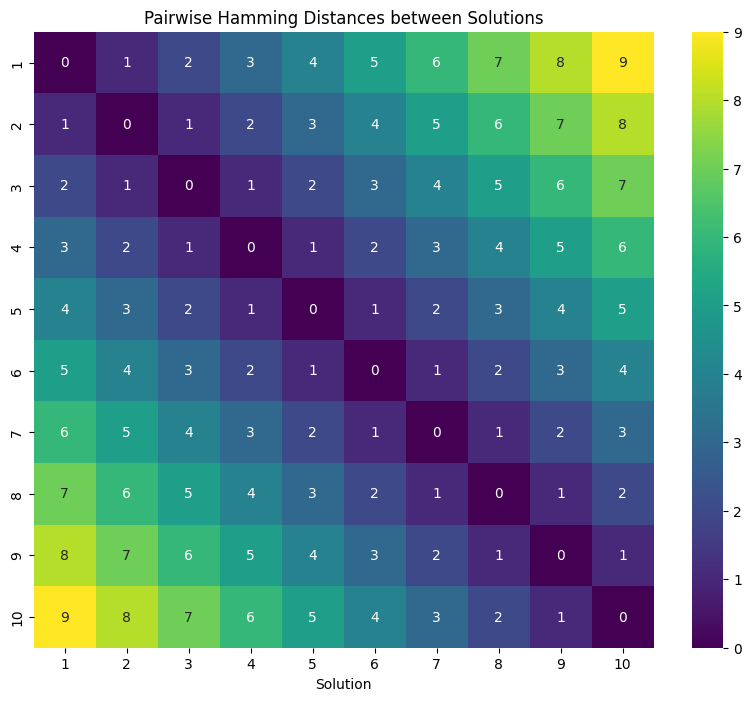

In [14]:
# plot the distance matrix

plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix, cmap='viridis', annot=True, xticklabels=range(1, 11), yticklabels=range(1, 11))
plt.title('Pairwise Hamming Distances between Solutions')
plt.xlabel('Solution')

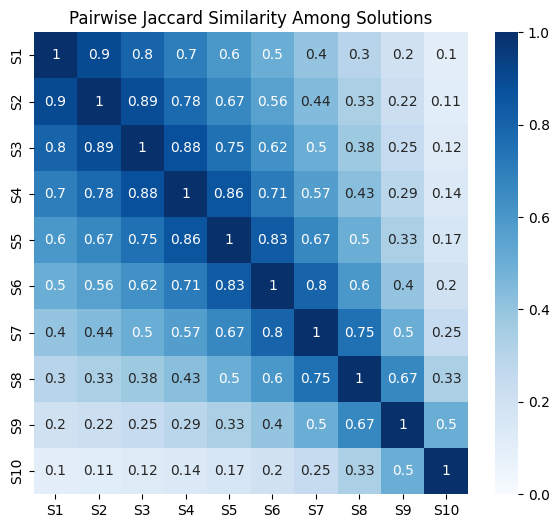

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1) Convert each list of genes to a set:
set_solutions = [set(sol) for sol in genes_list]

# 2) Create a matrix to store pairwise Jaccard similarities:
n = len(set_solutions)
jaccard_matrix = [[0]*n for _ in range(n)]

for i in range(n):
    for j in range(n):
        intersection = set_solutions[i].intersection(set_solutions[j])
        union = set_solutions[i].union(set_solutions[j])
        jaccard_matrix[i][j] = len(intersection) / len(union)

# 3) Put the matrix in a pandas DataFrame for easy plotting:
df_jaccard = pd.DataFrame(
    jaccard_matrix, 
    index=[f"S{i}" for i in range(1,n+1)], 
    columns=[f"S{i}" for i in range(1,n+1)]
)

# 4) Plot a heatmap of the Jaccard similarities:
plt.figure(figsize=(7, 6))
sns.heatmap(df_jaccard, annot=True, cmap="Blues", vmin=0, vmax=1)
plt.title("Pairwise Jaccard Similarity Among Solutions")
plt.show()


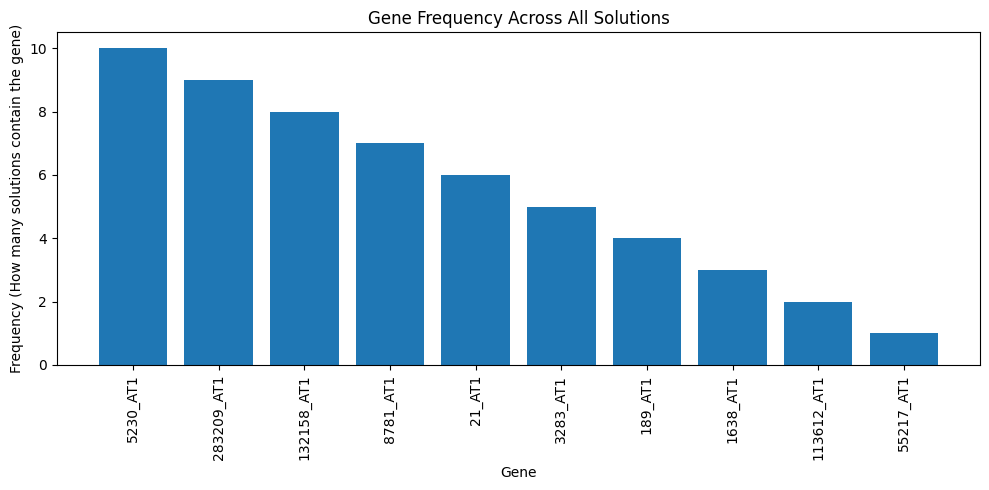

In [16]:
from collections import Counter
import matplotlib.pyplot as plt

# Flatten all solutions into one list:
all_genes = []
for sol in genes_list:
    all_genes.extend(sol)

# Count how many times each gene appears:
gene_counts = Counter(all_genes)

# The maximum number of solutions a gene can appear in is n (the total number of solutions).
# Let's sort them by frequency:
sorted_gene_counts = sorted(gene_counts.items(), key=lambda x: x[1], reverse=True)

# Separate keys and values for plotting:
genes = [item[0] for item in sorted_gene_counts]
counts = [item[1] for item in sorted_gene_counts]

plt.figure(figsize=(10, 5))
plt.bar(range(len(genes)), counts)
plt.xticks(range(len(genes)), genes, rotation=90)
plt.xlabel("Gene")
plt.ylabel("Frequency (How many solutions contain the gene)")
plt.title("Gene Frequency Across All Solutions")
plt.tight_layout()
plt.show()


In [17]:
simplified_solution
    

,Step,Remaining Genes,Genes Count,Removed Gene,Fitness,Delta,Individual
0,0,189_AT1;1638_AT1;3283_AT1;55217_AT1;21_AT1;132...,10,NaN,6.479791,0.000000,0
1,1,189_AT1;1638_AT1;3283_AT1;21_AT1;132158_AT1;52...,9,55217_AT1,6.479193,0.000599,0
2,2,189_AT1;1638_AT1;3283_AT1;21_AT1;132158_AT1;52...,8,113612_AT1,6.477763,0.001430,0
3,3,189_AT1;3283_AT1;21_AT1;132158_AT1;5230_AT1;87...,7,1638_AT1,6.476067,0.001696,0
4,4,3283_AT1;21_AT1;132158_AT1;5230_AT1;8781_AT1;2...,6,189_AT1,6.470099,0.005968,0
...,...,...,...,...,...,...,...
88,5,21_AT1;132158_AT1;5230_AT1;8781_AT1;283209_AT1,5,189_AT1,6.454117,0.006057,9
89,6,132158_AT1;5230_AT1;8781_AT1;283209_AT1,4,21_AT1,6.367559,0.086559,9
90,7,132158_AT1;5230_AT1;283209_AT1,3,8781_AT1,6.206517,0.161041,9
91,8,5230_AT1;283209_AT1,2,132158_AT1,5.673439,0.533078,9


In [18]:
# Make a Counter of different solution  between the different solutions sizes
genes = simplified_solution['Remaining Genes']
gene_counts = Counter(genes)
gene_counts

Counter({'189_AT1;1638_AT1;3283_AT1;55217_AT1;21_AT1;132158_AT1;5230_AT1;8781_AT1;283209_AT1;113612_AT1': 1,
         '189_AT1;1638_AT1;3283_AT1;21_AT1;132158_AT1;5230_AT1;8781_AT1;283209_AT1;113612_AT1': 1,
         '189_AT1;1638_AT1;3283_AT1;21_AT1;132158_AT1;5230_AT1;8781_AT1;283209_AT1': 3,
         '189_AT1;3283_AT1;21_AT1;132158_AT1;5230_AT1;8781_AT1;283209_AT1': 5,
         '3283_AT1;21_AT1;132158_AT1;5230_AT1;8781_AT1;283209_AT1': 9,
         '21_AT1;132158_AT1;5230_AT1;8781_AT1;283209_AT1': 10,
         '132158_AT1;5230_AT1;8781_AT1;283209_AT1': 10,
         '132158_AT1;5230_AT1;283209_AT1': 10,
         '5230_AT1;283209_AT1': 10,
         '5230_AT1': 10,
         '189_AT1;1638_AT1;3283_AT1;55217_AT1;2053_AT1;21_AT1;132158_AT1;5230_AT1;8781_AT1;283209_AT1': 1,
         '189_AT1;1638_AT1;3283_AT1;2053_AT1;21_AT1;132158_AT1;5230_AT1;8781_AT1;283209_AT1': 1,
         '189_AT1;1638_AT1;246_AT1;3283_AT1;55217_AT1;21_AT1;132158_AT1;5230_AT1;8781_AT1;283209_AT1': 1,
         '189_AT1

In [19]:
# sort the dictionary by values
gene_counts = dict(sorted(gene_counts.items(), key=lambda item: item[1], reverse=True))
gene_counts

{'21_AT1;132158_AT1;5230_AT1;8781_AT1;283209_AT1': 10,
 '132158_AT1;5230_AT1;8781_AT1;283209_AT1': 10,
 '132158_AT1;5230_AT1;283209_AT1': 10,
 '5230_AT1;283209_AT1': 10,
 '5230_AT1': 10,
 '3283_AT1;21_AT1;132158_AT1;5230_AT1;8781_AT1;283209_AT1': 9,
 '189_AT1;3283_AT1;21_AT1;132158_AT1;5230_AT1;8781_AT1;283209_AT1': 5,
 '189_AT1;1638_AT1;3283_AT1;21_AT1;132158_AT1;5230_AT1;8781_AT1;283209_AT1': 3,
 '1638_AT1;3283_AT1;21_AT1;132158_AT1;5230_AT1;8781_AT1;283209_AT1': 3,
 '189_AT1;1638_AT1;3283_AT1;55217_AT1;21_AT1;132158_AT1;5230_AT1;8781_AT1;283209_AT1;113612_AT1': 1,
 '189_AT1;1638_AT1;3283_AT1;21_AT1;132158_AT1;5230_AT1;8781_AT1;283209_AT1;113612_AT1': 1,
 '189_AT1;1638_AT1;3283_AT1;55217_AT1;2053_AT1;21_AT1;132158_AT1;5230_AT1;8781_AT1;283209_AT1': 1,
 '189_AT1;1638_AT1;3283_AT1;2053_AT1;21_AT1;132158_AT1;5230_AT1;8781_AT1;283209_AT1': 1,
 '189_AT1;1638_AT1;246_AT1;3283_AT1;55217_AT1;21_AT1;132158_AT1;5230_AT1;8781_AT1;283209_AT1': 1,
 '189_AT1;1638_AT1;3283_AT1;55217_AT1;21_AT1;1321

In [20]:
# Remover duplicatas com base na coluna 'Fitness'
simplified_solution = simplified_solution.drop_duplicates(subset='Fitness')

# Garantir que 'Genes Count' está no formato inteiro
simplified_solution['Genes Count'] = simplified_solution['Genes Count'].astype(int)

# Filtrar apenas soluções com tamanho <= 5
simplified_solution = simplified_solution[simplified_solution['Genes Count'] <= 5]

# Exibir resultado
simplified_solution.head()


/tmp/ipykernel_2652530/3771744426.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simplified_solution['Genes Count'] = simplified_solution['Genes Count'].astype(int)


,Step,Remaining Genes,Genes Count,Removed Gene,Fitness,Delta,Individual
5,5,21_AT1;132158_AT1;5230_AT1;8781_AT1;283209_AT1,5,3283_AT1,6.454117,0.015982,0
6,6,132158_AT1;5230_AT1;8781_AT1;283209_AT1,4,21_AT1,6.367559,0.086559,0
7,7,132158_AT1;5230_AT1;283209_AT1,3,8781_AT1,6.206517,0.161041,0
8,8,5230_AT1;283209_AT1,2,132158_AT1,5.673439,0.533078,0
9,9,5230_AT1,1,283209_AT1,5.232511,0.440928,0


In [21]:
values = simplified_solution['Fitness'].values
values

array([6.45411705, 6.36755852, 6.20651749, 5.67343899, 5.23251086])

In [22]:
# Option 1: Absolute Differences

absolute_diff = np.abs(np.diff(values))



# Option 2: Percentage Changes

percentage_change = np.abs(np.diff(values) / values[:-1]) * 100



# Option 3: Statistical Test (z-score for each change)

mean_diff = np.mean(np.diff(values))

std_diff = np.std(np.diff(values))

z_scores = (np.diff(values) - mean_diff) / std_diff



# Combining Results

results = pd.DataFrame({

    "Value": values,

    "Absolute_Difference": np.append(absolute_diff, np.nan),

    "Percentage_Change": np.append(percentage_change, np.nan),

    "Z_Score": np.append(z_scores, np.nan),    
    
    })


In [23]:
results

,Value,Absolute_Difference,Percentage_Change,Z_Score
0,6.454117,0.086559,1.341137,1.174234
1,6.367559,0.161041,2.529086,0.774587
2,6.206517,0.533078,8.589011,-1.221633
3,5.673439,0.440928,7.771796,-0.727187
4,5.232511,NaN,NaN,NaN


genes = WBGene00009824, WBGene00015553, WBGene00015778, WBGene00012326, WBGene00002879, WBGene00009119, WBGene00001077

In [24]:
# WBGene00009824, WBGene00015553, WBGene00015778, WBGene00012326, WBGene00002879, WBGene00009119, WBGene00001077
genes = ['21_AT1', '132158_AT1', '5230_AT1', '8781_AT1', '283209_AT1']
df_check_pos = pd.read_csv('table_individual_rts.csv')
# sort by fitness value
df_check_pos = df_check_pos.sort_values(by='Single-gene rTS', ascending=False)
df_check_pos = df_check_pos[df_check_pos['Gene'].apply(lambda x: any([gene in x for gene in genes]))]
df_check_pos

,Gene,Single-gene rTS
2,5230_AT1,5.232511
3,8781_AT1,4.286551
0,21_AT1,0.307918
1,132158_AT1,0.277853
4,283209_AT1,0.004870
